
#The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
#Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
# Explore and analyze the data to discover key factors responsible for app engagement and success

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as date
%matplotlib inline

In [47]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#Imorting first data set(Play store Data )
df=pd.read_csv('/content/drive/MyDrive/Copy of Play Store Data.csv')

In [49]:
#Importing second data set(User Review)
df_review=pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

# **Understanding the dataset**

In [50]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [52]:
df.shape

(10841, 13)

In [53]:
#rating have maximum null values in data set 
df= df.dropna(subset=["Rating"],how= "all")

In [54]:
df.shape

(9367, 13)

In [55]:
#rempving all  duplicate  from first data set
df = df.drop_duplicates()

In [56]:
df.shape

(8893, 13)

In [57]:
list(df.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [58]:
#rempving all  duplicate  from coloumns 
df = df.drop_duplicates(subset= ["App","Category","Rating","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8318 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8318 non-null   object 
 1   Category        8318 non-null   object 
 2   Rating          8318 non-null   float64
 3   Reviews         8318 non-null   object 
 4   Size            8318 non-null   object 
 5   Installs        8318 non-null   object 
 6   Type            8318 non-null   object 
 7   Price           8318 non-null   object 
 8   Content Rating  8317 non-null   object 
 9   Genres          8318 non-null   object 
 10  Last Updated    8318 non-null   object 
 11  Current Ver     8314 non-null   object 
 12  Android Ver     8315 non-null   object 
dtypes: float64(1), object(12)
memory usage: 909.8+ KB


In [60]:
df = df.dropna(subset= ["Current Ver","Android Ver"],how = "any")

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8311 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8311 non-null   object 
 1   Category        8311 non-null   object 
 2   Rating          8311 non-null   float64
 3   Reviews         8311 non-null   object 
 4   Size            8311 non-null   object 
 5   Installs        8311 non-null   object 
 6   Type            8311 non-null   object 
 7   Price           8311 non-null   object 
 8   Content Rating  8311 non-null   object 
 9   Genres          8311 non-null   object 
 10  Last Updated    8311 non-null   object 
 11  Current Ver     8311 non-null   object 
 12  Android Ver     8311 non-null   object 
dtypes: float64(1), object(12)
memory usage: 909.0+ KB


In [124]:
#Cleaning second data set(User Review)
#dropping all the null values
df_review=df_review.dropna(subset=["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"],how="all")

In [62]:
df['Category'].value_counts()

FAMILY                 1685
GAME                    916
TOOLS                   721
PRODUCTIVITY            304
FINANCE                 303
LIFESTYLE               301
PERSONALIZATION         296
MEDICAL                 294
PHOTOGRAPHY             267
BUSINESS                264
SPORTS                  263
COMMUNICATION           257
HEALTH_AND_FITNESS      244
NEWS_AND_MAGAZINES      206
SOCIAL                  204
TRAVEL_AND_LOCAL        187
SHOPPING                186
BOOKS_AND_REFERENCE     169
VIDEO_PLAYERS           151
DATING                  135
MAPS_AND_NAVIGATION     120
EDUCATION               118
ENTERTAINMENT           102
FOOD_AND_DRINK           96
AUTO_AND_VEHICLES        73
WEATHER                  73
LIBRARIES_AND_DEMO       63
HOUSE_AND_HOME           62
ART_AND_DESIGN           60
COMICS                   54
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

# **1. Which category of App is most popular on Play store?**

In [63]:
#removing the unwanted value
df=df.drop(df.index[df['Category']=='1.9'])

Text(0, 0.5, 'number')

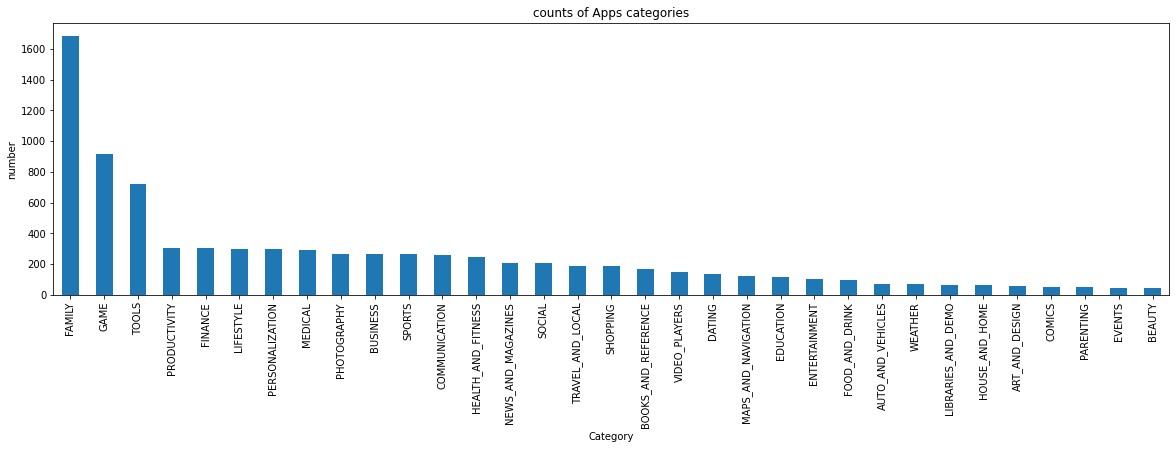

In [64]:
#ploting a bar graph for finding which category has highest share of apps
category_bar=df['Category'].value_counts().plot.bar(figsize=(20,5))
category_bar.set_title('counts of Apps categories')
category_bar.set_xlabel('Category')
category_bar.set_ylabel('number')

# **2.finding distribution  and average of rating**

Text(0.5, 0, 'Rating')

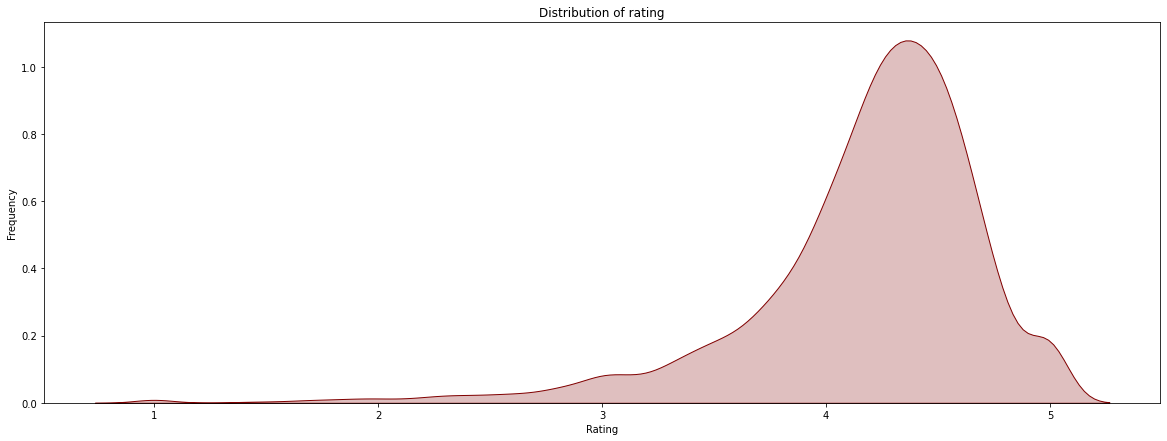

In [141]:
#finding distribution of rating
plt.figure(figsize=(20,7)) 
b= sns.kdeplot(df['Rating'],color='Maroon',shade=True)
b.set_title('Distribution of rating')
b.set_ylabel('Frequency')
b.set_xlabel('Rating')

Text(0.5, 1.0, 'average of Ratings')

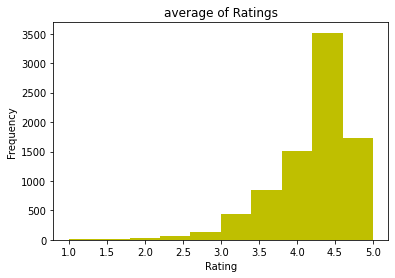

In [66]:
#finding average rating 
plt.hist(df.Rating.values,color='y')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('average of Ratings')

# **3.Finding which category have max installs**

In [67]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [70]:
#Removing special character
df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [72]:
df['Installs'] = df['Installs'].apply(lambda x : int(x))

In [73]:
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [74]:
#grouping avg install for each Category of apps
df_install=df.groupby(['Category'])['Installs'].mean()

Text(0, 0.5, 'Installs')

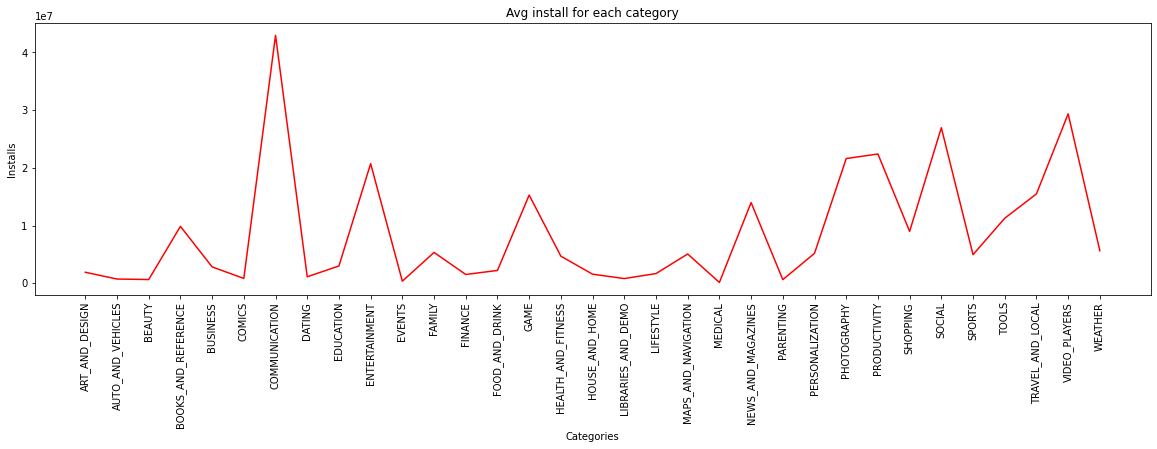

In [143]:
#finding which Category has maximum app install
plt.figure(figsize=(20,5))
plt.plot(df_install, color='r')
plt.xticks(rotation=90)
plt.title('Avg install for each category')
plt.xlabel('Categories')
plt.ylabel('Installs')

# **4.Finding which type app have more rating(Free vs Paid)**

In [77]:
#grouping rating and type(Free and Paid)
rating_free_paid=df.groupby(['Rating'])['Type'].value_counts().unstack()

Text(0, 0.5, 'counts of type')

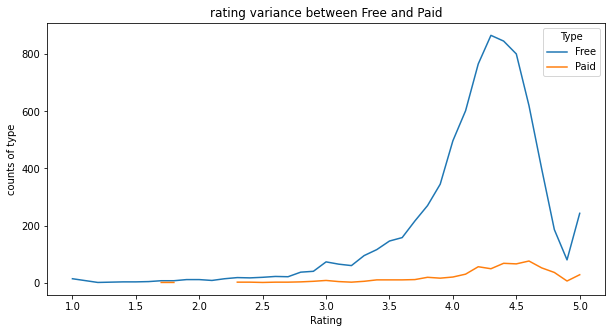

In [80]:
#comparing using multiline graph
rating_free_paid.plot(figsize=(10,5))
plt.title('rating variance between Free and Paid')
plt.xlabel('Rating')
plt.ylabel('counts of type')

# **5.Finding which App Category have maximum average reviews**

In [82]:
#replacing object type value in int
df['Reviews']=df['Reviews'].replace('3.0M',3000000)

In [83]:
#converting Reviews to integer data type
df['Reviews']=df['Reviews'].astype(int)

Text(0.5, 0, 'Category')

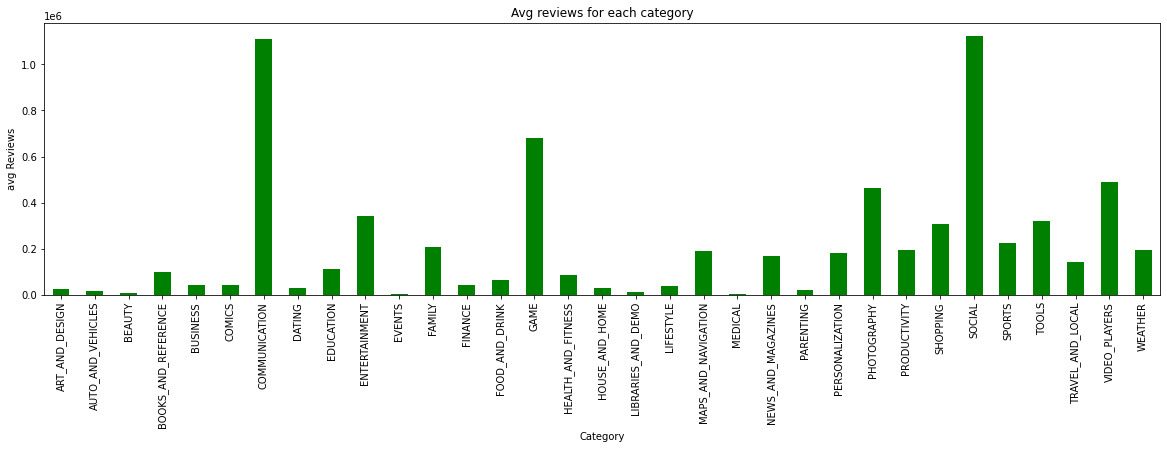

In [84]:
#Average rating for each category
avg_rating =df.groupby(['Category'])['Reviews'].mean()
b=avg_rating.plot.bar(figsize=(20,5),color='g')
b.set_title('Avg reviews for each category')
b.set_ylabel('avg Reviews')
b.set_xlabel('Category')

# **6.Finding top 10 genres of apps**




In [85]:
#Unique Genres
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [86]:
x=df['Genres'].value_counts().reset_index()[:10]
x.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)
y=df['Genres'].value_counts().reset_index()[:10]
y.rename(columns={'index':'Genres','Genres':'Index'},inplace=True)

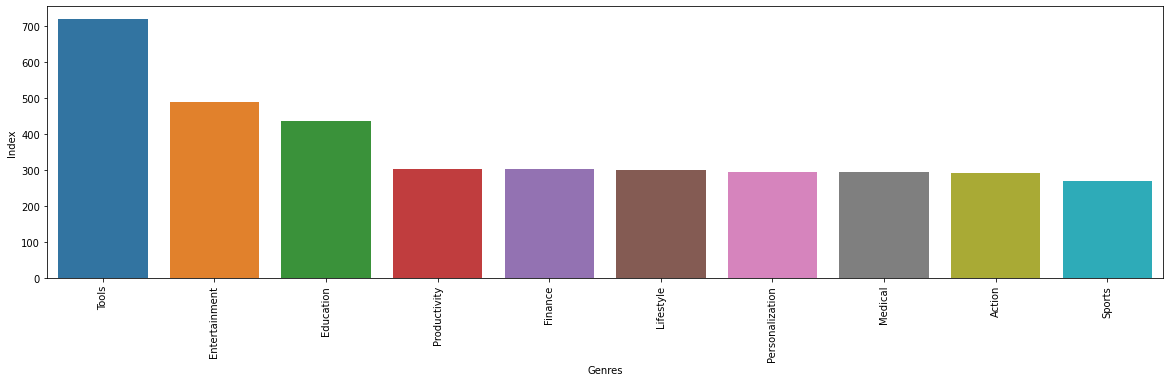

In [87]:
plt.figure(figsize=(20,5))
fig=sns.barplot(x=x['Genres'],y=y['Index']);
plt.xticks(rotation=90);

# **7.Apps for each age group(content rating)**

In [89]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


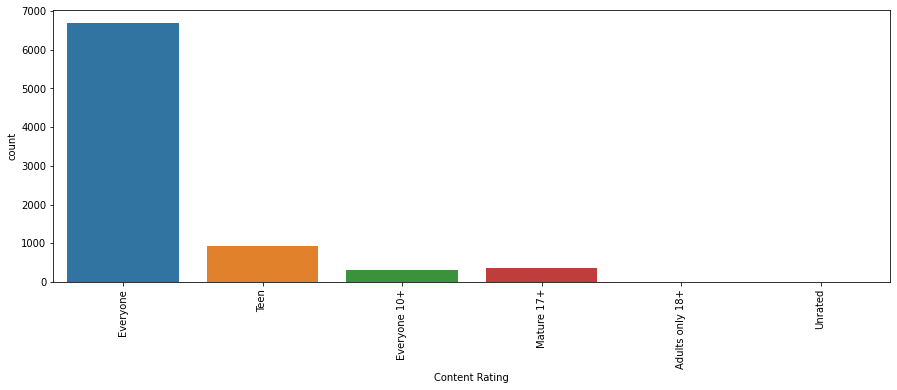

In [139]:
plt.figure(figsize=(15,5))
sns.countplot(df['Content Rating'])
plt.xticks(rotation=90)
plt.show()

# **8.Top 10 app whose price is maximum**

In [94]:
#Removing '$' symbol from Price column
df['Price']=df['Price'].str.replace('$','')
df['Price'] = df['Price'].apply(lambda x : float(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [95]:
top_paid_apps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


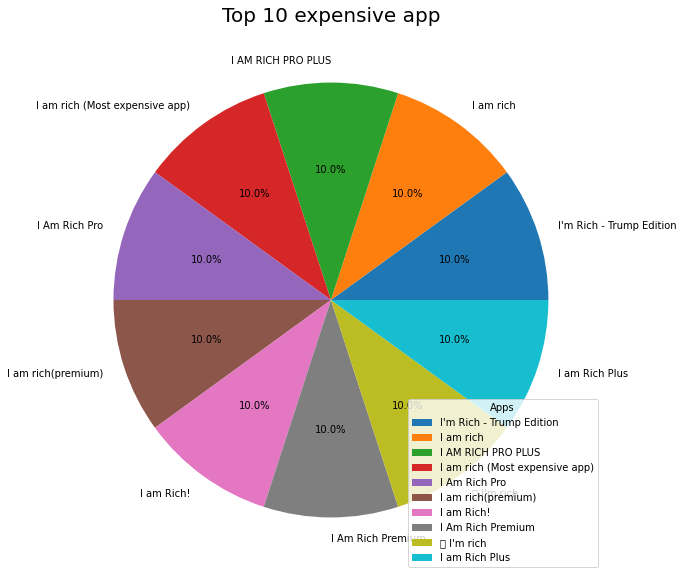

In [96]:
plt.figure(figsize=(15,10))
plt.pie(top_paid_apps.Price, explode=None, labels=top_paid_apps.App, autopct='%1.1f%%', startangle=0)
plt.title('Top 10 expensive app',size = 20)
plt.legend(top_paid_apps.App, loc="lower right", title="Apps")

# **9.Finding Android version for each Category**

In [97]:
#replacing all the value of Android version into single digit(float)
df['Android Ver'].replace({'4.4W and up':'4.4','Varies with device':'1.0'},inplace=True)
df['Android Ver'].replace({a: '1.0' for a in ['1.0','1.0 and up','1.5 and up','1.6 and up']},inplace=True)
df['Android Ver'].replace({a: '2.0' for a in ['2.0 and up','2.0.1 and up','2.1 and up','2.2 and up','2.2 - 7.1.1','2.3 and up','2.3.3 and up']},inplace=True)
df['Android Ver'].replace({a: '3.0' for a in ['3.0 and up','3.1 and up','3.2 and up']},inplace=True)
df['Android Ver'].replace({a: '4.0' for a in ['4.0 and up','4.0.3 and up','4.0.3 - 7.1.1','4.1 and up','4.1 - 7.1.1','4.2 and up','4.3 and up','4.4','4.4 and up']},inplace=True)
df['Android Ver'].replace({a: '5.0' for a in ['5.0 - 6.0','5.0 - 7.1.1','5.0 - 8.0','5.0 and up','5.1 and up']},inplace=True)
df['Android Ver'].replace({a: '6.0' for a in ['6.0 and up']},inplace=True)
df['Android Ver'].replace({a: '7.0' for a in ['7.0 - 7.1.1','7.0 and up','7.1 and up']},inplace=True)
df['Android Ver'].replace({a: '8.0' for a in ['8.0 and up']},inplace=True)

In [98]:
df['Android Ver'].head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: Android Ver, dtype: object

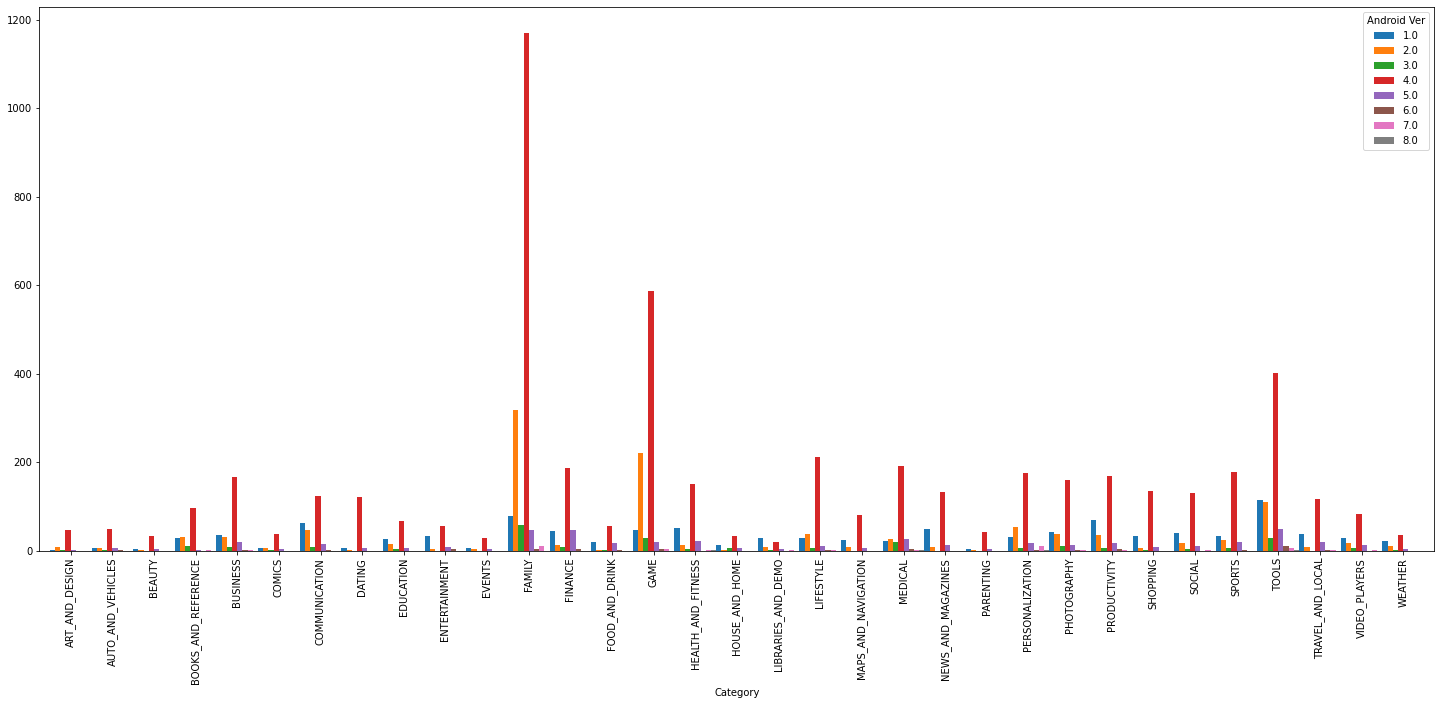

In [101]:
#plotting bar
category_version = df.groupby('Category')['Android Ver'].value_counts().unstack().plot.bar(figsize=(25,10), width=1)
plt.show()

# **10.Effect of updation of app on their Ratings**

In [102]:
#converting into datetime format
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [103]:
df['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

In [104]:
update_rating=df.groupby(['Last Updated'])['Rating'].count()

Text(0.5, 1.0, 'Last Update VS Rating')

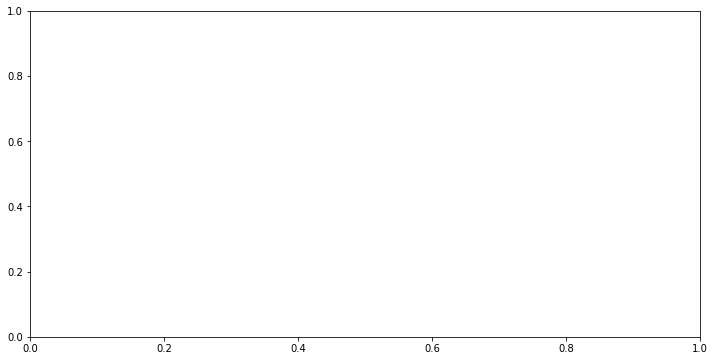

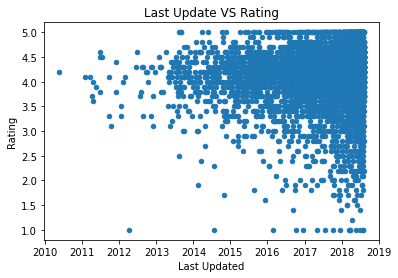

In [107]:
#plotting scatter graph
fig, ax = plt.subplots(figsize=(12,6))
df.plot.scatter(x="Last Updated", y="Rating")
plt.title("Last Update VS Rating")

# **11.Effect of price on Rating**

Text(0.5, 1.0, 'Price VS Rating')

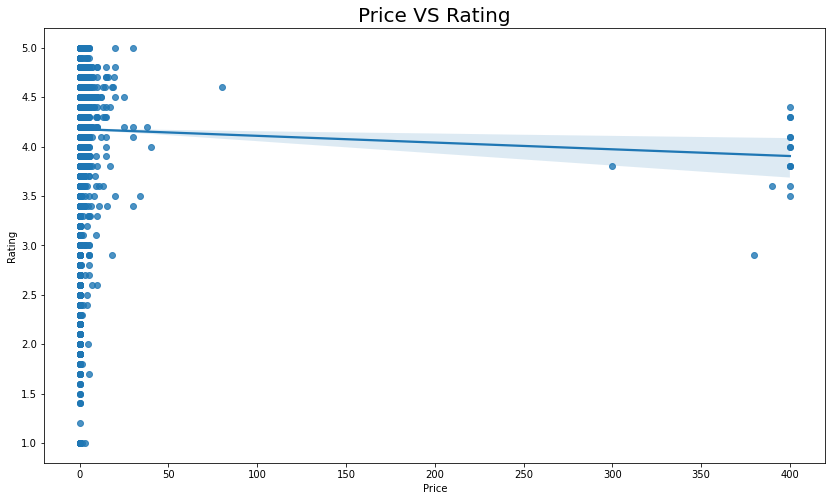

In [109]:
fig, ax = plt.subplots(figsize=(14,8))
sns.regplot(x="Price", y="Rating", data=df)
plt.title("Price VS Rating", size=20)

# **12.Is number of installs depend on size of the app?**

In [111]:
df['Size'].tail(10)

10828                   13M
10829                  7.4M
10830                  2.3M
10832                  582k
10833                  619k
10834                  2.6M
10836                   53M
10837                  3.6M
10839    Varies with device
10840                   19M
Name: Size, dtype: object

In [117]:
#converting 'Size' data type to float
df['Size']=df['Size'].str.replace('M','000000')
df['Size']=df['Size'].str.replace('k','000')
df['Size']=df['Size'].str.replace('Varies with device','1.0')

In [118]:
df['Size'] = df['Size'].apply(lambda x : float(x))

In [119]:
df['Size'].head()

0    19000000.0
1    14000000.0
2           8.7
3    25000000.0
4           2.8
Name: Size, dtype: float64

In [121]:
install_size=df.groupby(['Size'])['Installs'].count()

Text(0.5, 0, 'size of apps')

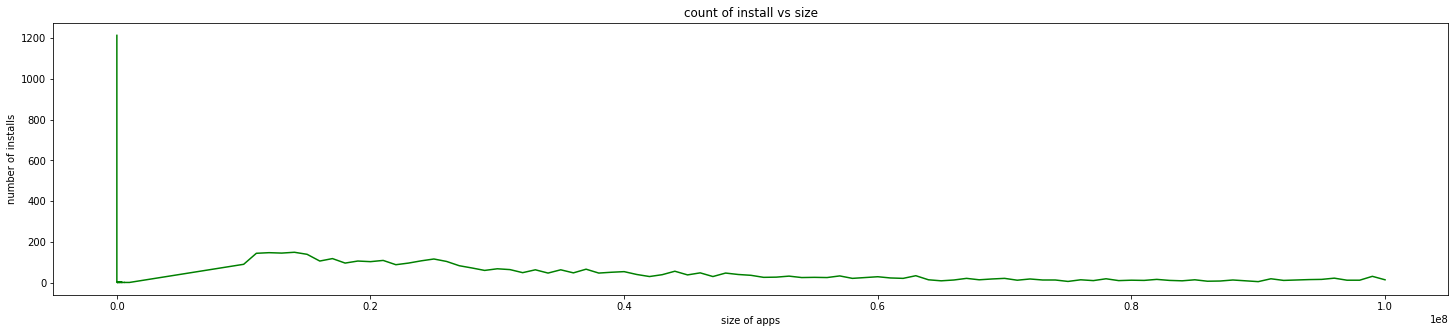

In [148]:
install_size.plot(figsize=(25,5),color='g')
plt.title('count of install vs size')
plt.ylabel('number of installs')
plt.xlabel('size of apps')

# **13.Finding correlation between play store data and user review data**

In [125]:
#copy of playstore data
x = df.copy() 
#copy of user review data
y = df_review.copy()

In [126]:
#merging 
merged_df1_review = pd.merge(x, y, how='inner', left_on='App', right_on='App')

In [128]:
merged_df1_review.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,I love colors inspyering,Positive,0.500,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0,I hate,Negative,-0.800,0.900000


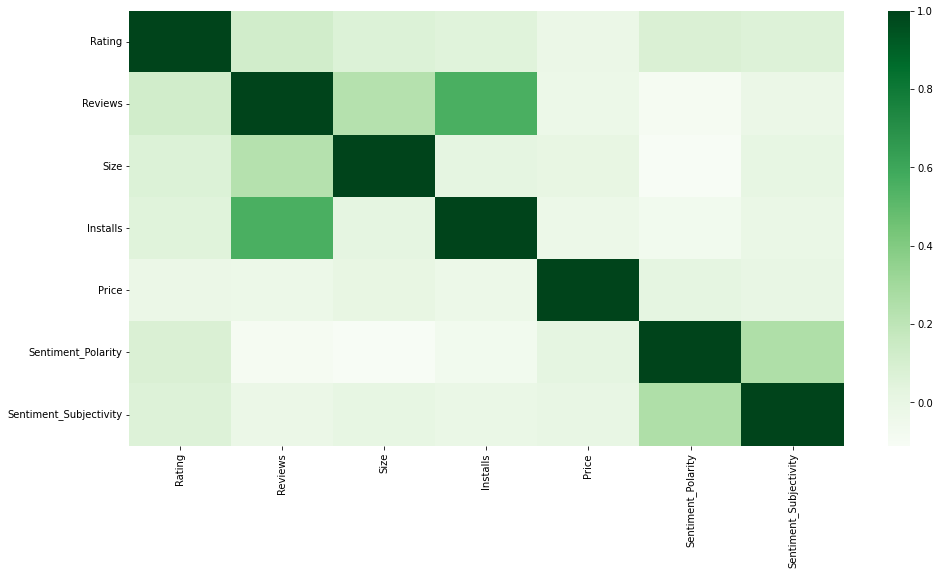

In [129]:
plt.figure(figsize=(16,8))
corr= merged_df1_review.corr()
sns.heatmap(corr,cmap='Greens')
plt.show()

# **14.Average of subjectvity**
# 0-Objective(fact)
# 1-Subjective(opinion)

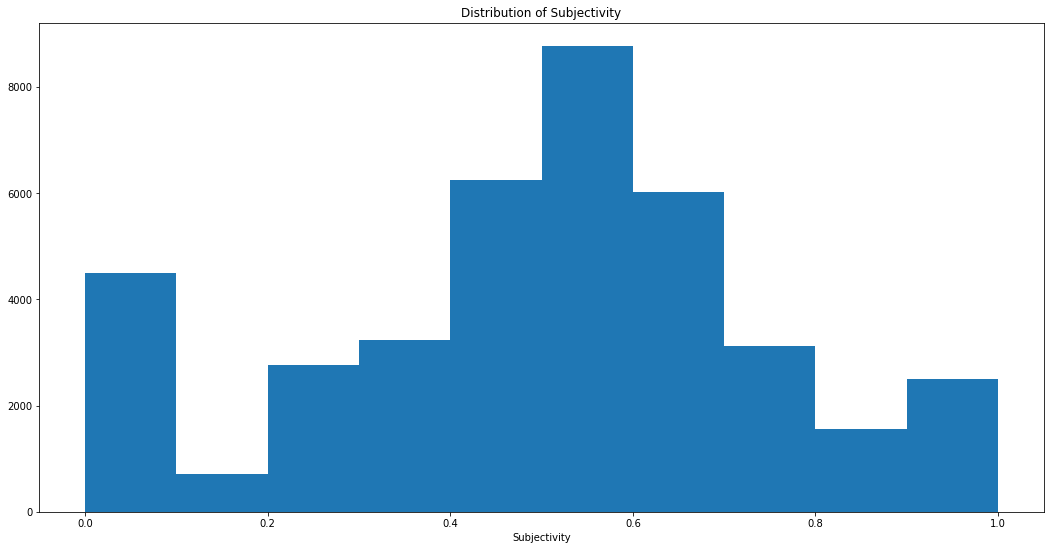

In [130]:
plt.figure(figsize=(18,9))
plt.hist(merged_df1_review[merged_df1_review['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")

plt.show()

# **15.Sentiment for free vs paid**

In [131]:
type_sentiment=merged_df1_review.groupby(['Type'])['Sentiment'].value_counts()

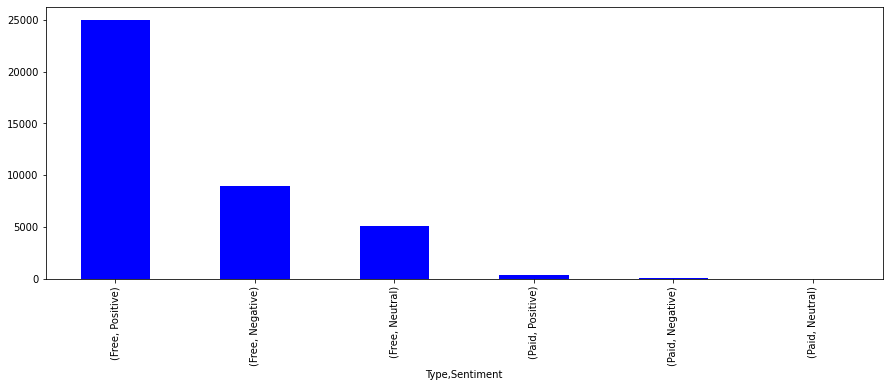

In [149]:
#Plotting bar for Sentiment Type for free vs paid
type_sentiment.plot.bar(figsize=(15,5),color='b')

# **16.Finding percentage of all Sentiment (reviews from the users)**

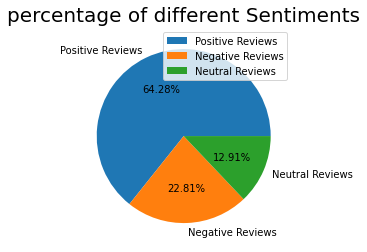

In [136]:
counts = list(merged_df1_review['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
plt.pie(counts, labels=labels,autopct="%.2f%%")
plt.title('percentage of different Sentiments', fontsize=20)
plt.legend()
plt.show()

# **END**